In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as k
import warnings
warnings.filterwarnings('ignore')
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.00,23.20,25.40,30.00,11.52,4.02
1,Bream,290.00,24.00,26.30,31.20,12.48,4.31
2,Bream,340.00,23.90,26.50,31.10,12.38,4.70
3,Bream,363.00,26.30,29.00,33.50,12.73,4.46
4,Bream,430.00,26.50,29.00,34.00,12.44,5.13


In [3]:
df.shape

(159, 7)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.00,398.33,357.98,0.00,120.00,273.00,650.00,1650.00
Length1,159.00,26.25,10.00,7.50,19.05,25.20,32.70,59.00
Length2,159.00,28.42,10.72,8.40,21.00,27.30,35.50,63.40
Length3,159.00,31.23,11.61,8.80,23.15,29.40,39.65,68.00
Height,159.00,8.97,4.29,1.73,5.94,7.79,12.37,18.96
Width,159.00,4.42,1.69,1.05,3.39,4.25,5.58,8.14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.isnull().mean()*100

Species   0.00
Weight    0.00
Length1   0.00
Length2   0.00
Length3   0.00
Height    0.00
Width     0.00
dtype: float64

In [7]:
df.duplicated().sum()

0

#### Now I am performing some EDA on dataset

### converting object data to numeric

In [8]:
le=LabelEncoder()

In [9]:
df['Species']=le.fit_transform(df['Species'])

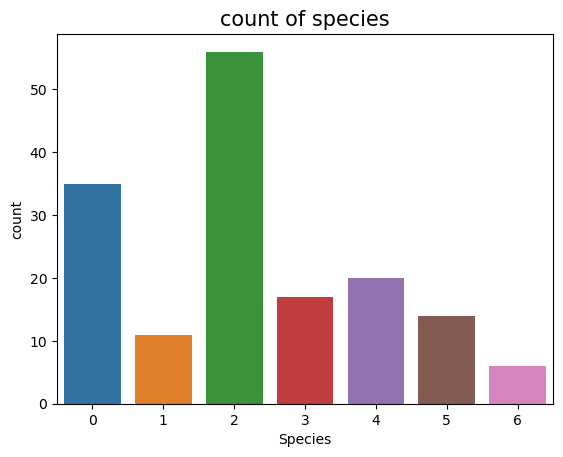

In [10]:
sns.countplot(x = 'Species', data = df)
plt.title('count of species',fontsize=15,color='black')
plt.show()

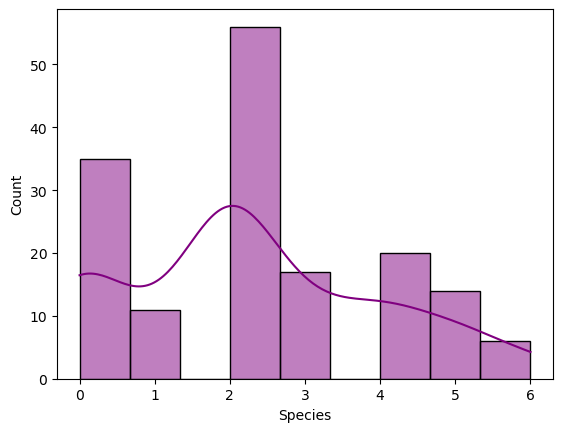

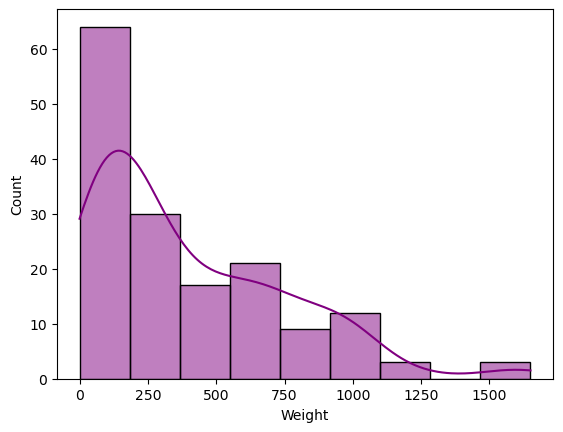

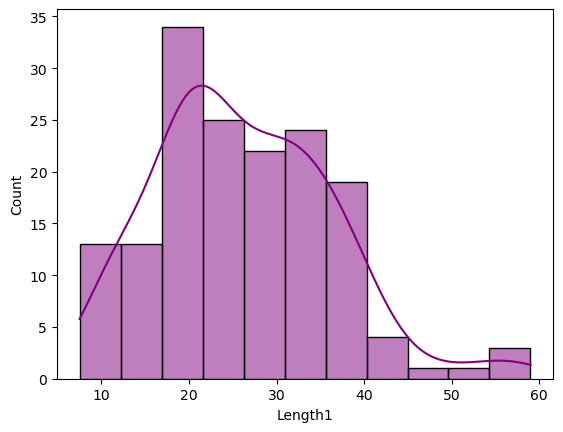

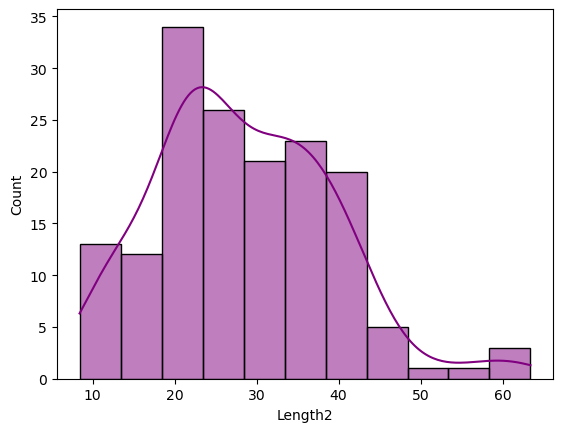

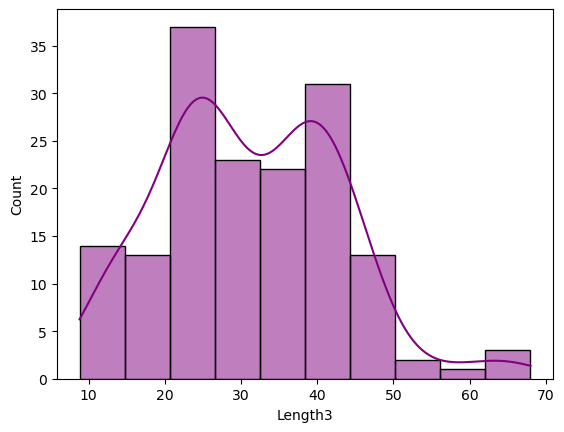

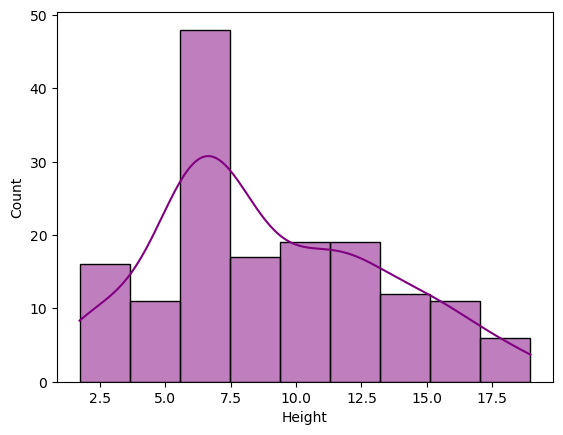

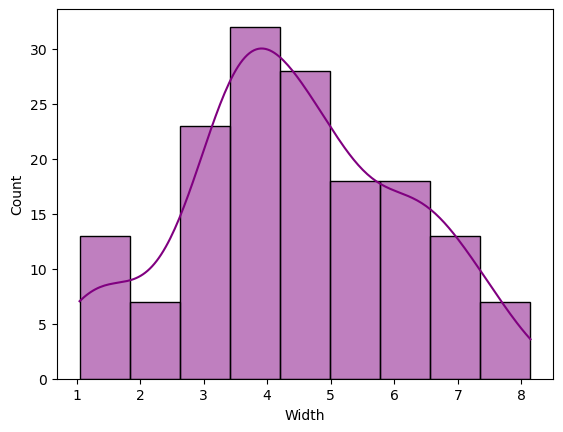

In [11]:
 for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i],kde=True,color='purple')
        plt.show()

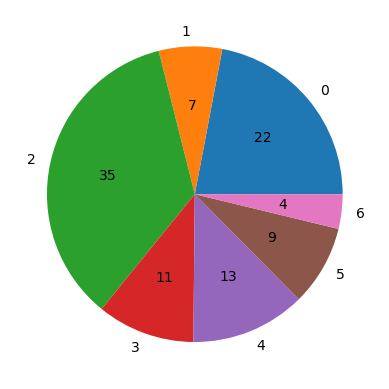

In [12]:
df.groupby('Species').size().plot(kind = 'pie' , autopct = '%.0f')
plt.show()

In [13]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

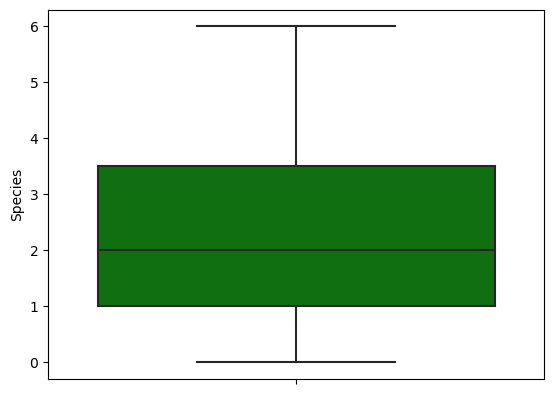

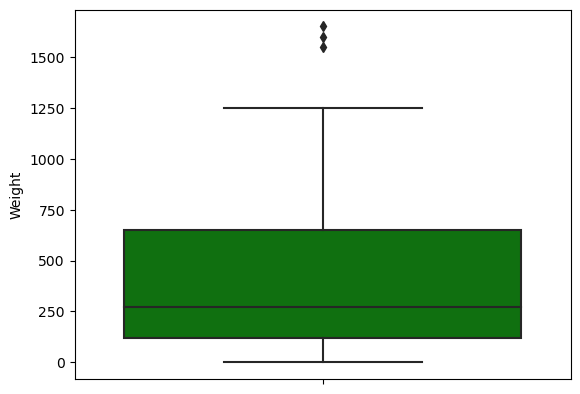

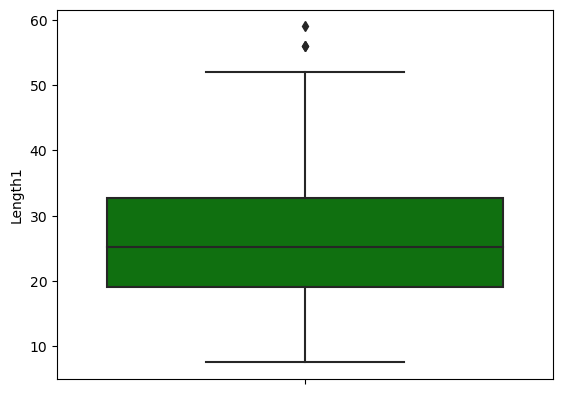

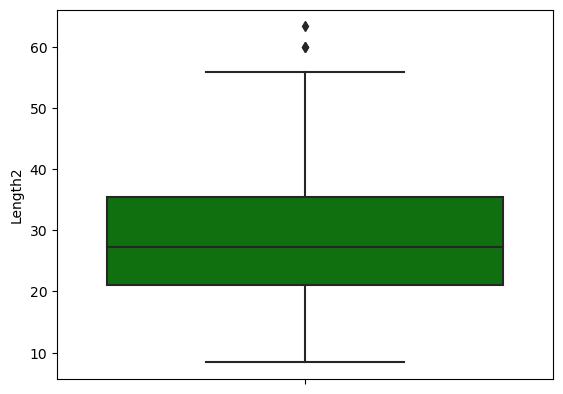

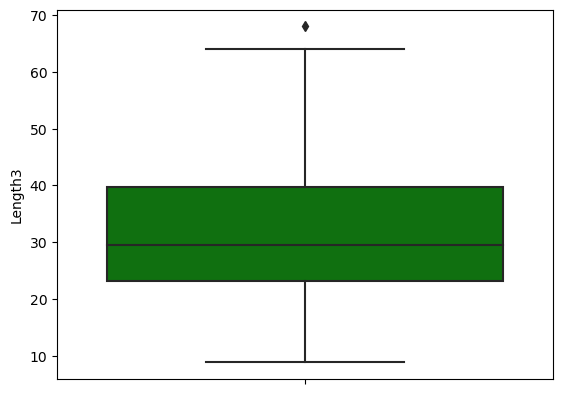

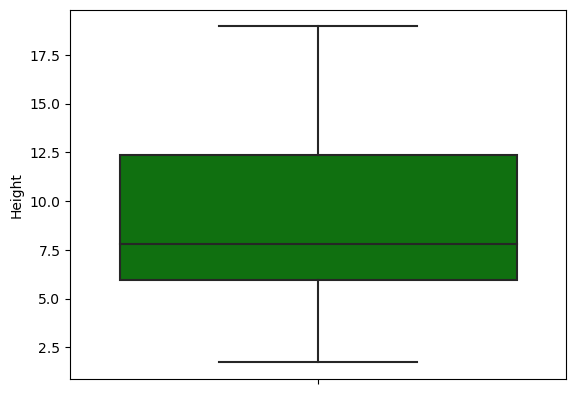

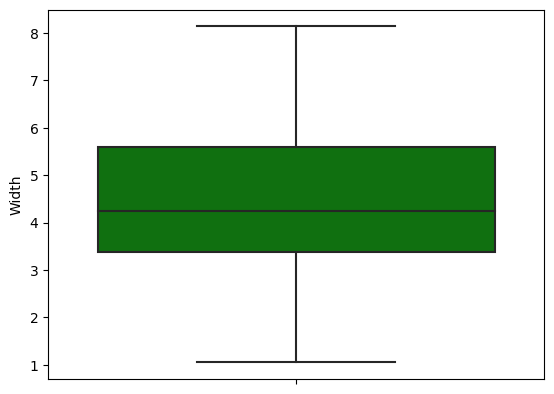

In [14]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i],color='green')
        plt.show()

#### Treating outliers

In [15]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [16]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL=outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

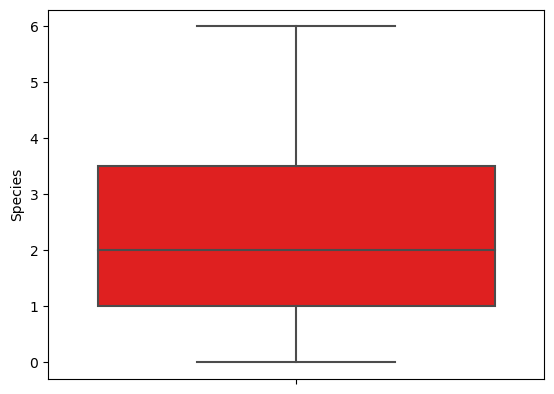

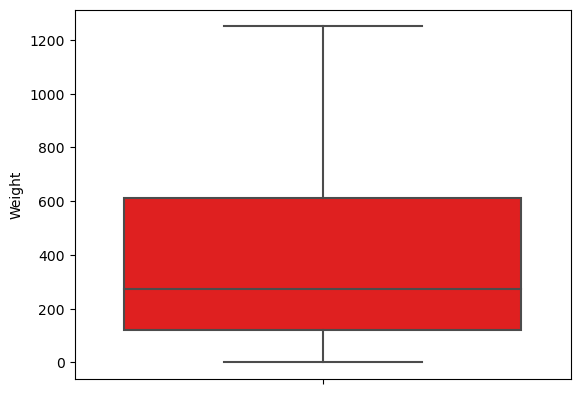

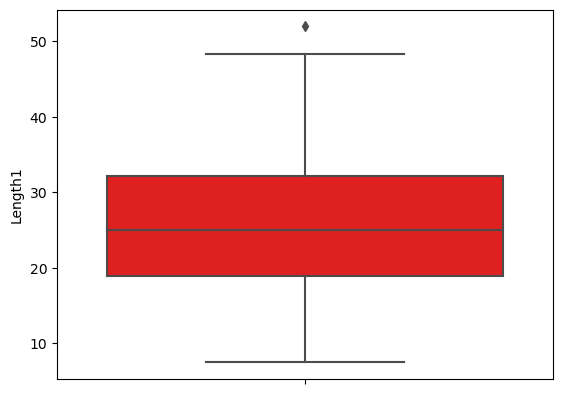

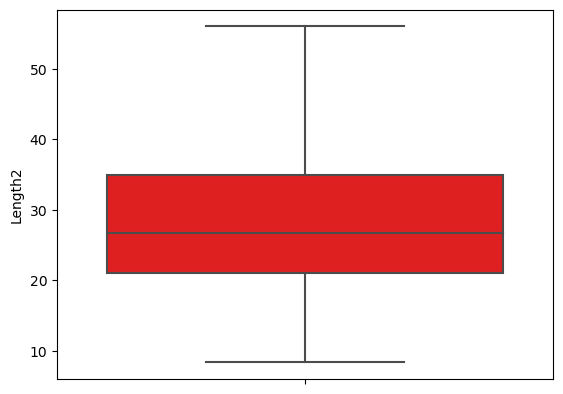

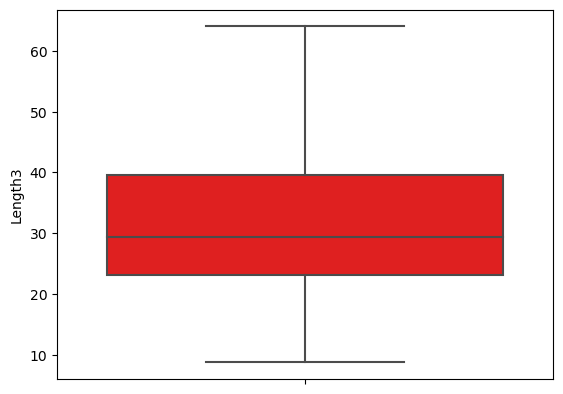

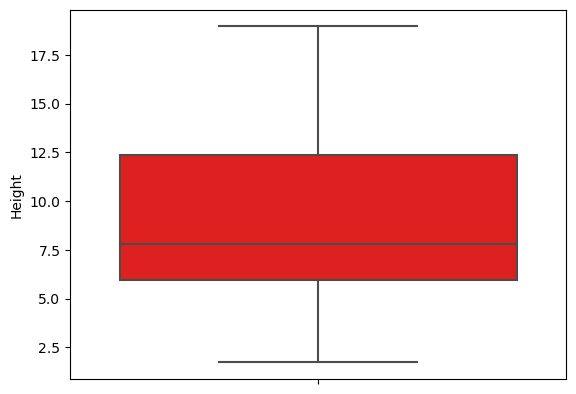

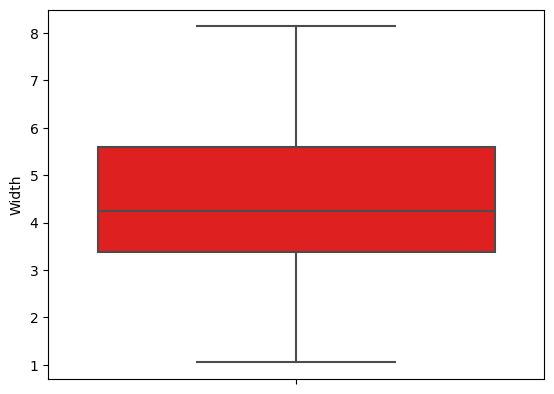

In [17]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i], color='red')
        plt.show()

In [18]:
df.isnull().sum()

Species    0
Weight     3
Length1    3
Length2    3
Length3    1
Height     0
Width      0
dtype: int64

In [19]:
a=['Weight','Length1','Length2','Length3']
for i in a:
    mean1=df[i].mean()
    df[i].fillna(value=mean1,inplace=True)

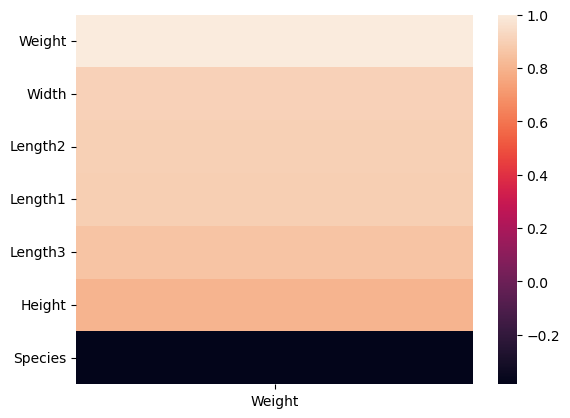

In [20]:
sns.heatmap(df.corr()[['Weight']].sort_values(by='Weight', ascending=False));

In [21]:
df.corr()[['Weight']].sort_values(by='Weight', ascending=False)

,Weight
Weight,1.00
Width,0.91
Length2,0.90
Length1,0.90
Length3,0.86
Height,0.80
Species,-0.39


In [22]:
x=df[['Width','Length2','Length1','Length3']].values

In [23]:
y=df[['Weight']].values

In [24]:
sc=StandardScaler()

In [25]:
x=sc.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [28]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  166.89431045613355
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  149.8617420391937
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  297.96145146980365
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  118.86987836020394
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  87.22370210992224
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  104.34200781696748
********************************************

In [29]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'Lasso':Lasso(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'HistGradientBoostingRegressor':HistGradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),

}

In [30]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score =model.score(x_train, y_train)*100
    testing_score =model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print('r2score:',score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse_test:',rmse)
    print('*'*100)

model trained with LinearRegression
r2score: 85.71467369172707
training_score: 87.23057723608609
testing_score: 85.71467369172707
mae: 101.24304894037391
mse: 14526.257871033587
rmse_test: 120.5249263473477
****************************************************************************************************
model trained with Ridge
r2score: 85.38690513136804
training_score: 87.19609967161429
testing_score: 85.38690513136804
mae: 102.63598480088409
mse: 14859.554466928317
rmse_test: 121.89977221852516
****************************************************************************************************
model trained with LinearSVR
r2score: -43.56115815699375
training_score: -35.41714096209682
testing_score: -43.56115815699375
mae: 275.90935341948915
mse: 145982.412907504
rmse_test: 382.07644903540444
****************************************************************************************************
model trained with Lasso
r2score: 85.27006727979665
training_score: 87.19998215629148
testi

In [31]:
model=ExtraTreesRegressor()

In [32]:
model.fit(x_train,y_train)

ExtraTreesRegressor()

In [33]:
y_pred = model.predict(x)

In [34]:
PREDICTION = pd.DataFrame(zip(y, y_pred), columns=('ACTUAL', 'PREDICTED'), dtype=float)
PREDICTION

,ACTUAL,PREDICTED
0,242.00,242.00
1,290.00,290.00
2,340.00,340.00
3,363.00,363.00
4,430.00,430.00
...,...,...
154,12.20,12.20
155,13.40,13.40
156,12.20,12.20
157,19.70,19.70


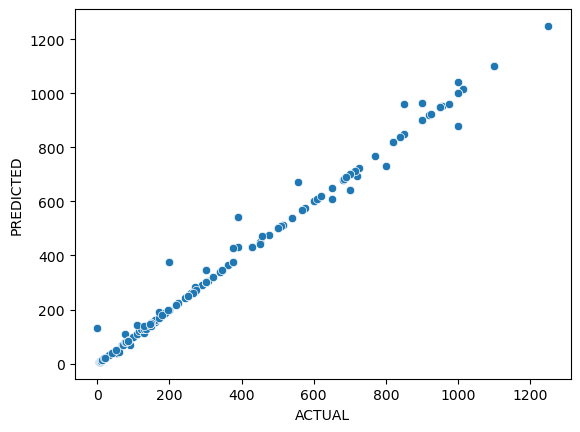

In [35]:
sns.scatterplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.show()

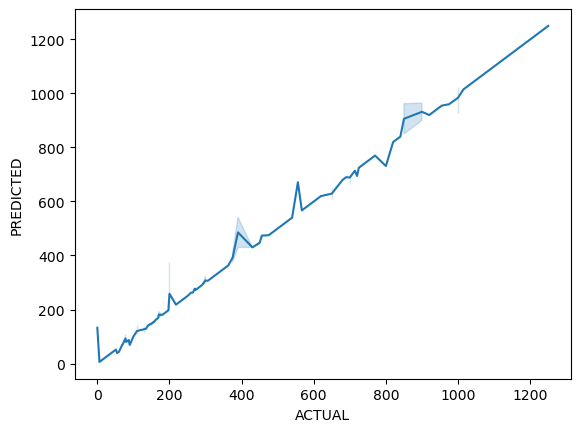

In [36]:
sns.lineplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.show()